In [1]:
import nibabel as nib 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from tqdm import tqdm

In [2]:
output_warp_harmonized = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/harm_ANTS_outputs_exptoinsp_large_images_emphysema_warped"

output_warp_harmonized_files = [file for file in os.listdir(output_warp_harmonized)]

output_warp_harmonized_files

subjects_BONE = sorted([file.replace("masked_", "").replace("STANDARD", "BONE").replace("_Warped.nii.gz", "")  for file in output_warp_harmonized_files])
subjects_BONE

subjects_STANDARD = sorted([file.replace("masked_", "").replace("BONE", "STANDARD").replace("_Warped.nii.gz", "") for file in output_warp_harmonized_files])
subjects_STANDARD, subjects_BONE

(['COPDGene_A43240_STANDARD',
  'COPDGene_A61757_STANDARD_control',
  'COPDGene_B05639_STANDARD',
  'COPDGene_B14644_STANDARD',
  'COPDGene_B15777_STANDARD_control',
  'COPDGene_B17236_STANDARD_control',
  'COPDGene_B17317_STANDARD_control',
  'COPDGene_B72303_STANDARD_control',
  'COPDGene_B86334_STANDARD',
  'COPDGene_C05262_STANDARD_control',
  'COPDGene_C19536_STANDARD_control',
  'COPDGene_C40785_STANDARD_control',
  'COPDGene_C53764_STANDARD_control',
  'COPDGene_C64141_STANDARD_control',
  'COPDGene_C64303_STANDARD_control',
  'COPDGene_C64585_STANDARD',
  'COPDGene_C73437_STANDARD_control',
  'COPDGene_D32260_STANDARD_control',
  'COPDGene_D36309_STANDARD',
  'COPDGene_D41724_STANDARD_control',
  'COPDGene_D48362_STANDARD',
  'COPDGene_D70993_STANDARD',
  'COPDGene_D80990_STANDARD_control',
  'COPDGene_D90444_STANDARD',
  'COPDGene_E59904_STANDARD',
  'COPDGene_E69868_STANDARD',
  'COPDGene_E73754_STANDARD_control',
  'COPDGene_F02607_STANDARD',
  'COPDGene_F32094_STANDARD',
  

In [3]:
insp_bone = pd.read_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/val_test/insp_BONE_emphysema/emph.csv")
exp_std = pd.read_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/val_test/exp_STANDARD_emphysema/emph.csv")
harm_insptoexp_std = pd.read_csv("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/experiments/insp_exp_run1_results_cycleGAN/harmonized_emphysema_epoch5/emph.csv")

insp_bone = insp_bone.sort_values(by = "pid")
exp_std = exp_std.sort_values(by = "pid")
harm_insptoexp_std = harm_insptoexp_std.sort_values(by = "pid")

#Check if subjects BONE in insp_bone
insp_bone = insp_bone[insp_bone["pid"].isin(subjects_BONE)]
exp_std = exp_std[exp_std["pid"].isin(subjects_STANDARD)]
harm_insptoexp_std = harm_insptoexp_std[harm_insptoexp_std["pid"].isin(subjects_BONE)]



In [4]:
insp_bone_emphysema = insp_bone["emph_score"].to_list()
exp_std_emphysema = exp_std["emph_score"].to_list()
harm_insptoexp_std_emphysema = harm_insptoexp_std["emph_score"].to_list()

In [5]:
insp_bone_emphysema

[11.08249408422003,
 4.7687242862090775,
 20.17189790117901,
 30.26650725032933,
 17.04575560708764,
 1.8330324819738508,
 2.3151845337402825,
 7.659385964262629,
 23.767247356498466,
 2.552640742665035,
 8.845472329222362,
 2.960043423990492,
 5.07526624251681,
 15.7185096235542,
 10.08592430895568,
 11.228055055571472,
 1.350332852678239,
 3.340282483316131,
 10.872647293979064,
 11.632240440201008,
 19.7999439597702,
 28.810042711606,
 4.967414519200644,
 4.8408442433017616,
 23.209163882325537,
 33.610599183106594,
 5.429830752163514,
 4.359106561507814,
 18.04354719620345,
 12.741349786841733]

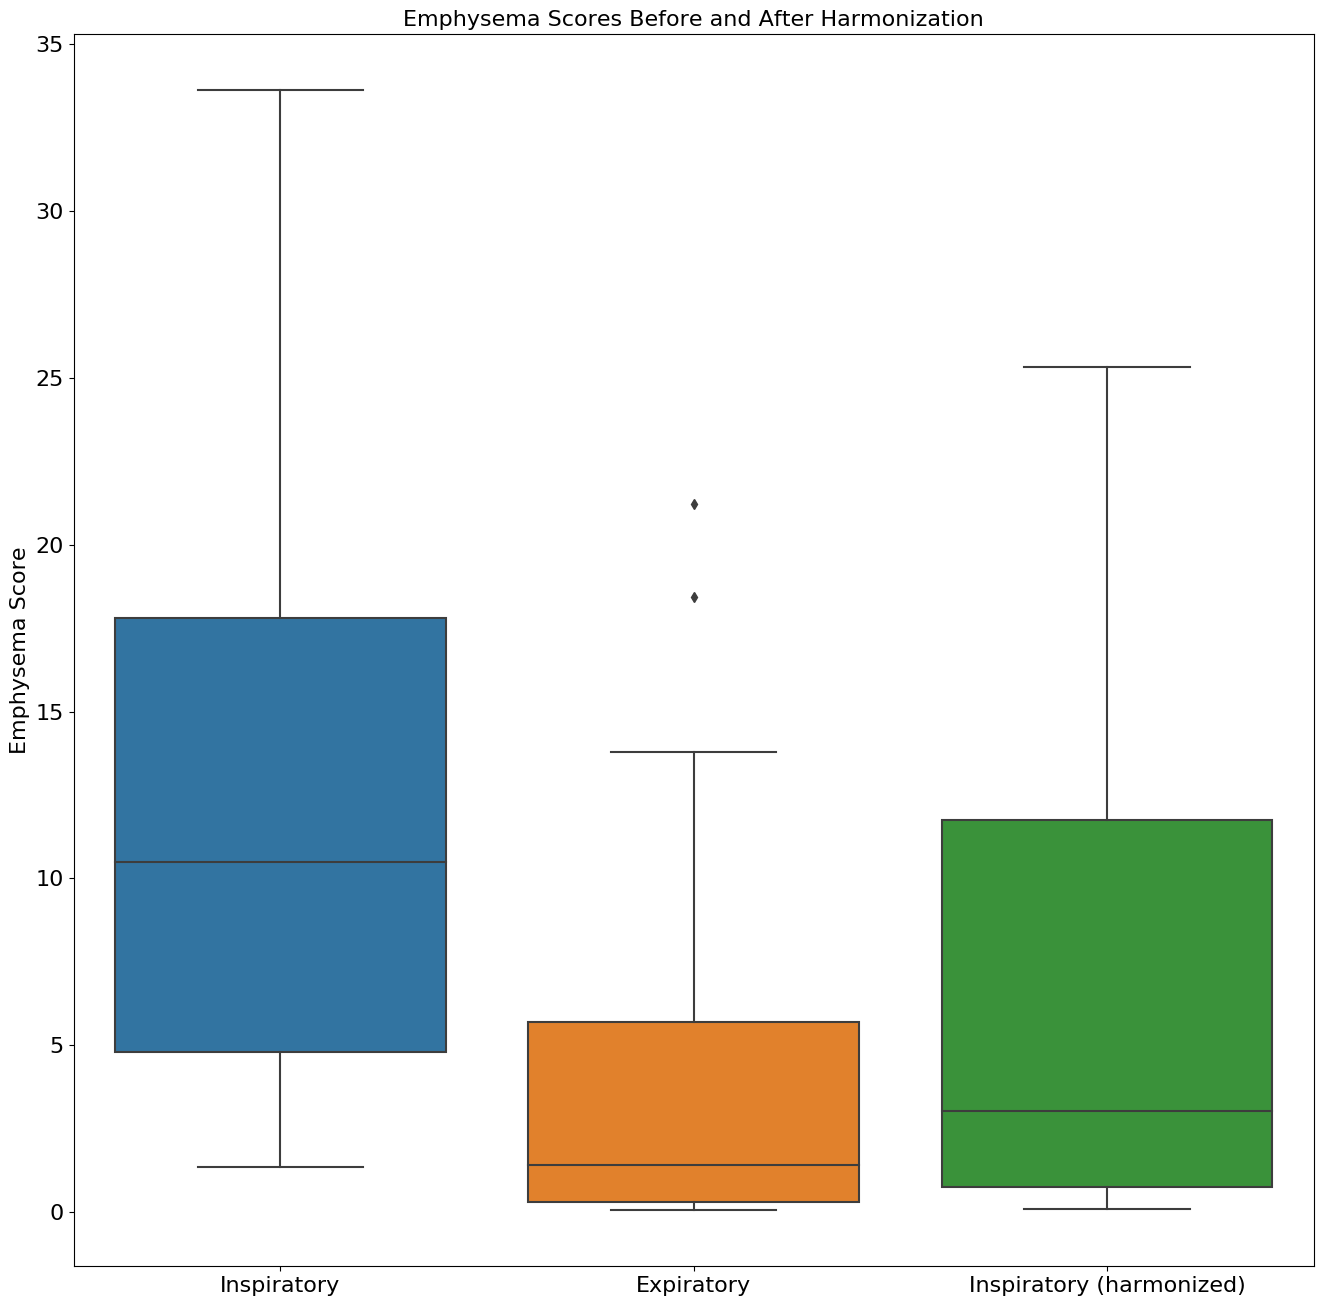

In [13]:
fig, ax = plt.subplots(figsize=(16, 16))
sns.boxplot(data=[insp_bone_emphysema, exp_std_emphysema, harm_insptoexp_std_emphysema], ax=ax)
ax.set_xticklabels(["Inspiratory", "Expiratory", "Inspiratory (harmonized)"], fontsize=16)
ax.set_ylabel("Emphysema Score", fontsize=16)
ax.tick_params(axis='y', labelsize=16)  # Change the fontsize of the y-tick labels
plt.title("Emphysema Scores Before and After Harmonization", fontsize=16)
plt.savefig("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/SPIE_paper_figures/quantitative/emphysema_score.tiff", dpi=300)
plt.show()

In [7]:
# Find the range of scores for the emphysema and showcase the median emphysema score 
insp_bone_emphysema = np.array(insp_bone_emphysema)
exp_std_emphysema = np.array(exp_std_emphysema)
harm_insptoexp_std_emphysema = np.array(harm_insptoexp_std_emphysema)

print(f"Inspiratory Emphysema Score Range: {np.min(insp_bone_emphysema):.3f}, {np.max(insp_bone_emphysema):.3f}")
print(f"Expiratory Emphysema Score Range: {np.min(exp_std_emphysema):.3f}, {np.max(exp_std_emphysema):.3f}")
print(f"Harmonized Inspiratory Emphysema Score Range: {np.min(harm_insptoexp_std_emphysema):.3f}, {np.max(harm_insptoexp_std_emphysema):.3f}")

print(f"Inspiratory Emphysema Score Median: {np.median(insp_bone_emphysema):.3f}")
print(f"Expiratory Emphysema Score Median: {np.median(exp_std_emphysema):.3f}")
print(f"Harmonized Inspiratory Emphysema Score Median: {np.median(harm_insptoexp_std_emphysema):.3f}")

Inspiratory Emphysema Score Range: 1.350, 33.611
Expiratory Emphysema Score Range: 0.058, 21.231
Harmonized Inspiratory Emphysema Score Range: 0.094, 25.322
Inspiratory Emphysema Score Median: 10.479
Expiratory Emphysema Score Median: 1.405
Harmonized Inspiratory Emphysema Score Median: 3.039


In [8]:
import numpy as np
from scipy.stats import wilcoxon

insp_bone_emphysema = np.array(insp_bone_emphysema)
exp_std_emphysema = np.array(exp_std_emphysema)
harm_insptoexp_std_emphysema = np.array(harm_insptoexp_std_emphysema)

diff_before = insp_bone_emphysema - exp_std_emphysema
diff_after = harm_insptoexp_std_emphysema - exp_std_emphysema

# Perform Wilcoxon signed-rank test
pval = wilcoxon(diff_before, diff_after).pvalue

print(f"Wilcoxon p-value:", pval)

Wilcoxon p-value: 2.603328389538926e-06


In [9]:
### Dice scores on the ANTS full run. Rigid, old deform and full run 
output_warp_harmonized = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/harm_ANTS_outputs_exptoinsp_large_images_emphysema_warped"

output_warp_harmonized_files = [file for file in os.listdir(output_warp_harmonized) if not file.endswith("control_Warped.nii.gz")]

output_warp_harmonized_files

subjects_BONE = sorted([file.replace("masked_", "").replace("STANDARD", "BONE").replace("_Warped.nii.gz", ".nii.gz") for file in output_warp_harmonized_files])
subjects_BONE

['COPDGene_A43240_BONE.nii.gz',
 'COPDGene_B05639_BONE.nii.gz',
 'COPDGene_B14644_BONE.nii.gz',
 'COPDGene_B86334_BONE.nii.gz',
 'COPDGene_C64585_BONE.nii.gz',
 'COPDGene_D36309_BONE.nii.gz',
 'COPDGene_D48362_BONE.nii.gz',
 'COPDGene_D70993_BONE.nii.gz',
 'COPDGene_D90444_BONE.nii.gz',
 'COPDGene_E59904_BONE.nii.gz',
 'COPDGene_E69868_BONE.nii.gz',
 'COPDGene_F02607_BONE.nii.gz',
 'COPDGene_F32094_BONE.nii.gz']

In [10]:
emph_bone_harm = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/experiments/insp_exp_run1_results_cycleGAN/harmonized_emphysema_epoch5/emphysema"
emph_rigid_reg = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/harm_rigid_registered_emphysema_masks_warped"
emph_deform_reg = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/ANTS_outputs_exptoinsp_harmonized_emphysema/warped_emphysema_masks"
emph_ANTS_full_reg = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/harm_ANTS_outputs_exptoinsp_large_images_emphysema_warped"

emph_bone_harm_files = sorted([file for file in os.listdir(emph_bone_harm) if file in subjects_BONE])
emph_rigid_reg_files = sorted([file for file in os.listdir(emph_rigid_reg) if file in output_warp_harmonized_files])
emph_deform_reg_files = sorted([file for file in os.listdir(emph_deform_reg) if file in output_warp_harmonized_files])
emph_ANTS_full_reg_files = sorted([file for file in os.listdir(emph_ANTS_full_reg) if file in output_warp_harmonized_files])

In [11]:
emph_bone_harm = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/experiments/insp_exp_run1_results_cycleGAN/harmonized_emphysema_epoch5/emphysema"
emph_rigid_reg = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/harm_rigid_registered_emphysema_masks_warped"
emph_deform_reg = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/ANTS_outputs_exptoinsp_harmonized_emphysema/warped_emphysema_masks"
emph_ANTS_full_reg = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/harm_ANTS_outputs_exptoinsp_large_images_emphysema_warped"

emph_bone_harm_files = sorted([file for file in os.listdir(emph_bone_harm) if file in subjects_BONE])
emph_rigid_reg_files = sorted([file for file in os.listdir(emph_rigid_reg) if file in output_warp_harmonized_files])
emph_deform_reg_files = sorted([file for file in os.listdir(emph_deform_reg) if file in output_warp_harmonized_files])
emph_ANTS_full_reg_files = sorted([file for file in os.listdir(emph_ANTS_full_reg) if file in output_warp_harmonized_files])

In [12]:
def dice_overlap(seg1, seg2):
    intersect = np.sum(seg1*seg2)
    fsum = np.sum(seg1)
    ssum = np.sum(seg2)
    dice = (2 * intersect) / (fsum + ssum)
    dice = np.mean(dice)
    dice = np.round(dice,3)
    return dice

dice_overlap_rigid = {}
dice_overlap_deform={}
dice_overlap_full={}

for i in tqdm(range(len(emph_bone_harm_files))):
    bone = nib.load(os.path.join(emph_bone_harm, emph_bone_harm_files[i])).get_fdata()
    rigid = nib.load(os.path.join(emph_rigid_reg, emph_rigid_reg_files[i])).get_fdata()

    bone_dice = dice_overlap(bone, rigid)

    dice_overlap_rigid[emph_bone_harm_files[i]] = bone_dice

for i in tqdm(range(len(emph_bone_harm_files))):
    bone = nib.load(os.path.join(emph_bone_harm, emph_bone_harm_files[i])).get_fdata()
    deform = nib.load(os.path.join(emph_deform_reg, emph_deform_reg_files[i])).get_fdata()

    bone_dice = dice_overlap(bone, deform)

    dice_overlap_deform[emph_bone_harm_files[i]] = bone_dice

for i in tqdm(range(len(emph_bone_harm_files))):
    bone = nib.load(os.path.join(emph_bone_harm, emph_bone_harm_files[i])).get_fdata()
    full = nib.load(os.path.join(emph_ANTS_full_reg, emph_ANTS_full_reg_files[i])).get_fdata()

    bone_dice = dice_overlap(bone, full)

    dice_overlap_full[emph_bone_harm_files[i]] = bone_dice


100%|██████████| 13/13 [00:46<00:00,  3.57s/it]


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Rigid v.s. Deformable (half resolution): t-test paired samples with Bonferroni correction, P_val=2.146e-04 stat=-5.909e+00
Deformable (half resolution) v.s. Deformable (full resolution): t-test paired samples with Bonferroni correction, P_val=6.241e-04 stat=-5.239e+00
Rigid v.s. Deformable (full resolution): t-test paired samples with Bonferroni correction, P_val=2.653e-04 stat=-5.773e+00


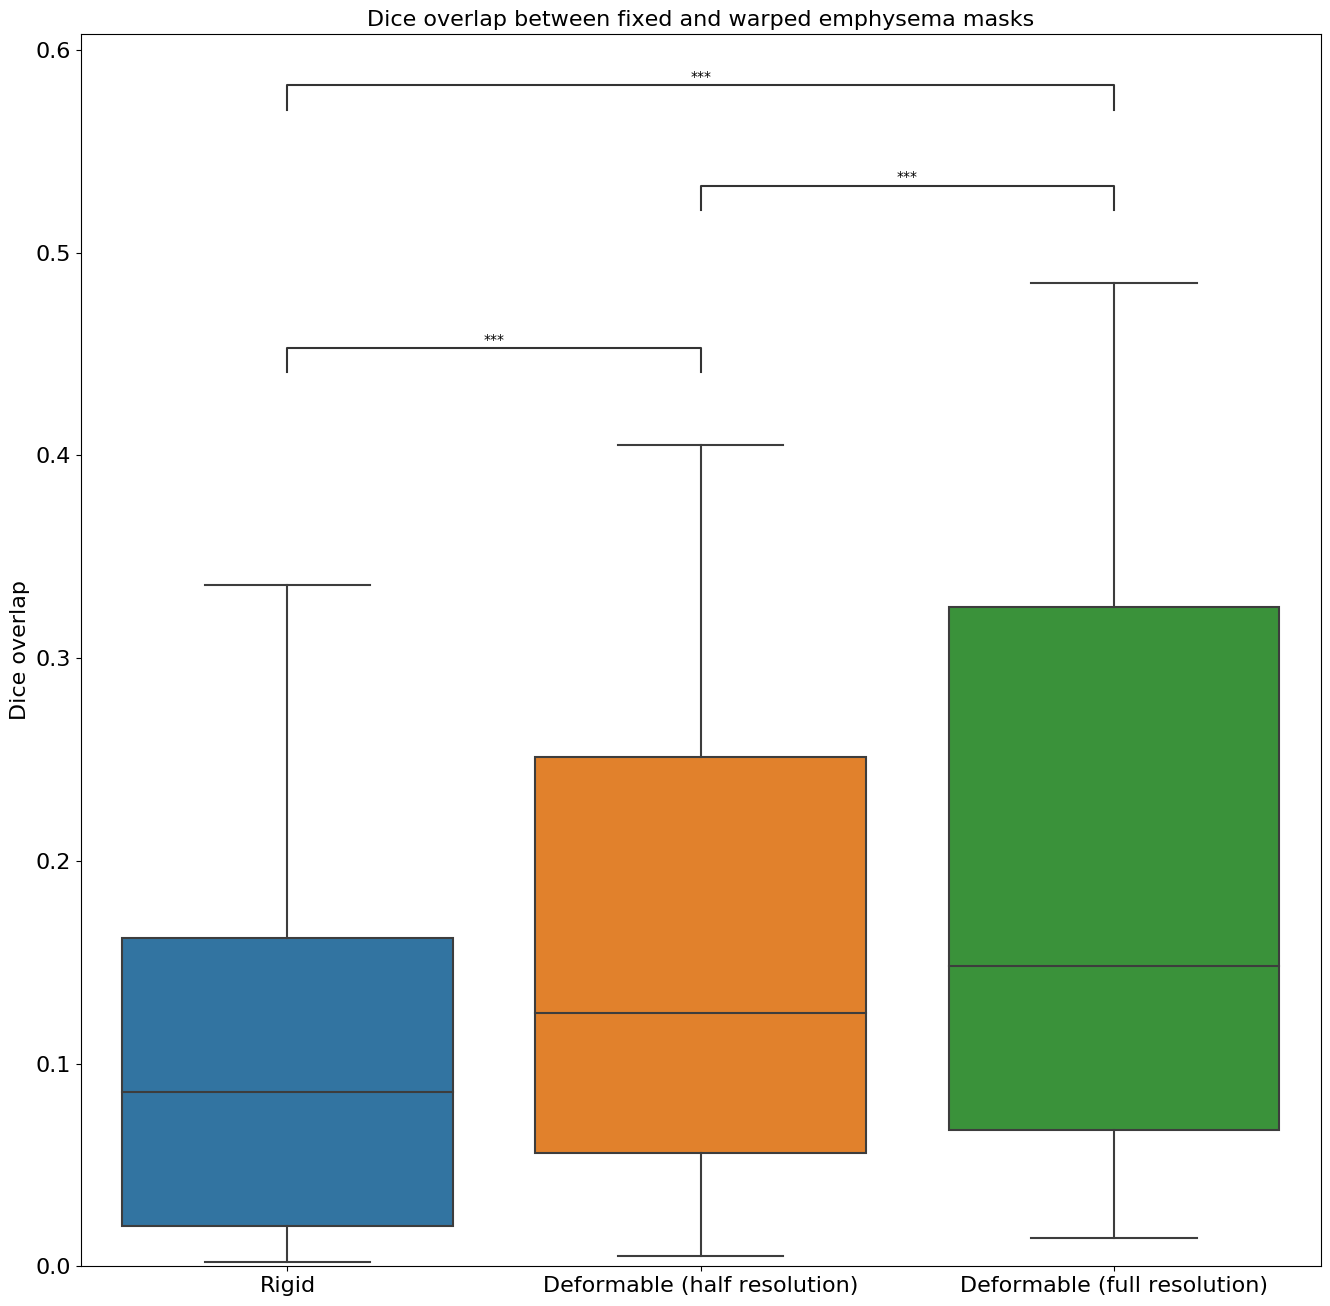

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from statannot import add_stat_annotation

# Assuming dice_overlap_rigid, dice_overlap_deform, and dice_overlap_full are defined
data = {
    'Rigid': dice_overlap_rigid,
    'Deformable (half resolution)': dice_overlap_deform,
    'Deformable (full resolution)': dice_overlap_full
}

df = pd.DataFrame(data)

plt.figure(figsize=(16, 16))
ax = sns.boxplot(data=df)
plt.ylabel("Dice overlap", fontsize=16)
plt.xticks(fontsize=16)
# plt.xticks(rotation=45)
plt.ylim(0, 0.6)
plt.yticks(fontsize=16)
plt.title("Dice overlap between fixed and warped emphysema masks", fontsize=16)

# Add statistical annotations
box_pairs = [
    ("Rigid", "Deformable (half resolution)"),
    ("Rigid", "Deformable (full resolution)"),
    ("Deformable (half resolution)", "Deformable (full resolution)"),
]

# Perform Wilcoxon signed-rank test and annotate
add_stat_annotation(ax, data=df, box_pairs=box_pairs,
                    test='t-test_paired', text_format='star', loc='inside', verbose=2)
plt.savefig("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/SPIE_paper_figures/quantitative/dice_overlap_harmonized_cases.tiff", dpi=300)
plt.show()

In [ ]:
print("Range of scores for the dice overlap between fixed and warped emphysema masks", df["Dice_rigid"].min(), df["Dice_rigid"].max())
print("Range of scores for the dice overlap between fixed and warped emphysema masks", df["Dice_deform_half_resolution"].min(), df["Dice_deform_half_resolution"].max())
print("Range of scores for the dice overlap between fixed and warped emphysema masks", df["Dice_deform_full_resolution"].min(), df["Dice_deform_full_resolution"].max())

print("Median of scores for the dice overlap between fixed and warped emphysema masks", df["Dice_rigid"].median())
print("Median of scores for the dice overlap between fixed and warped emphysema masks", df["Dice_deform_half_resolution"].median())
print("Median of scores for the dice overlap between fixed and warped emphysema masks", df["Dice_deform_full_resolution"].median())

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Rigid v.s. Deformable (half resolution): t-test paired samples with Bonferroni correction, P_val=2.146e-04 stat=-5.909e+00
Deformable (half resolution) v.s. Deformable (full resolution): t-test paired samples with Bonferroni correction, P_val=6.241e-04 stat=-5.239e+00
Rigid v.s. Deformable (full resolution): t-test paired samples with Bonferroni correction, P_val=2.653e-04 stat=-5.773e+00


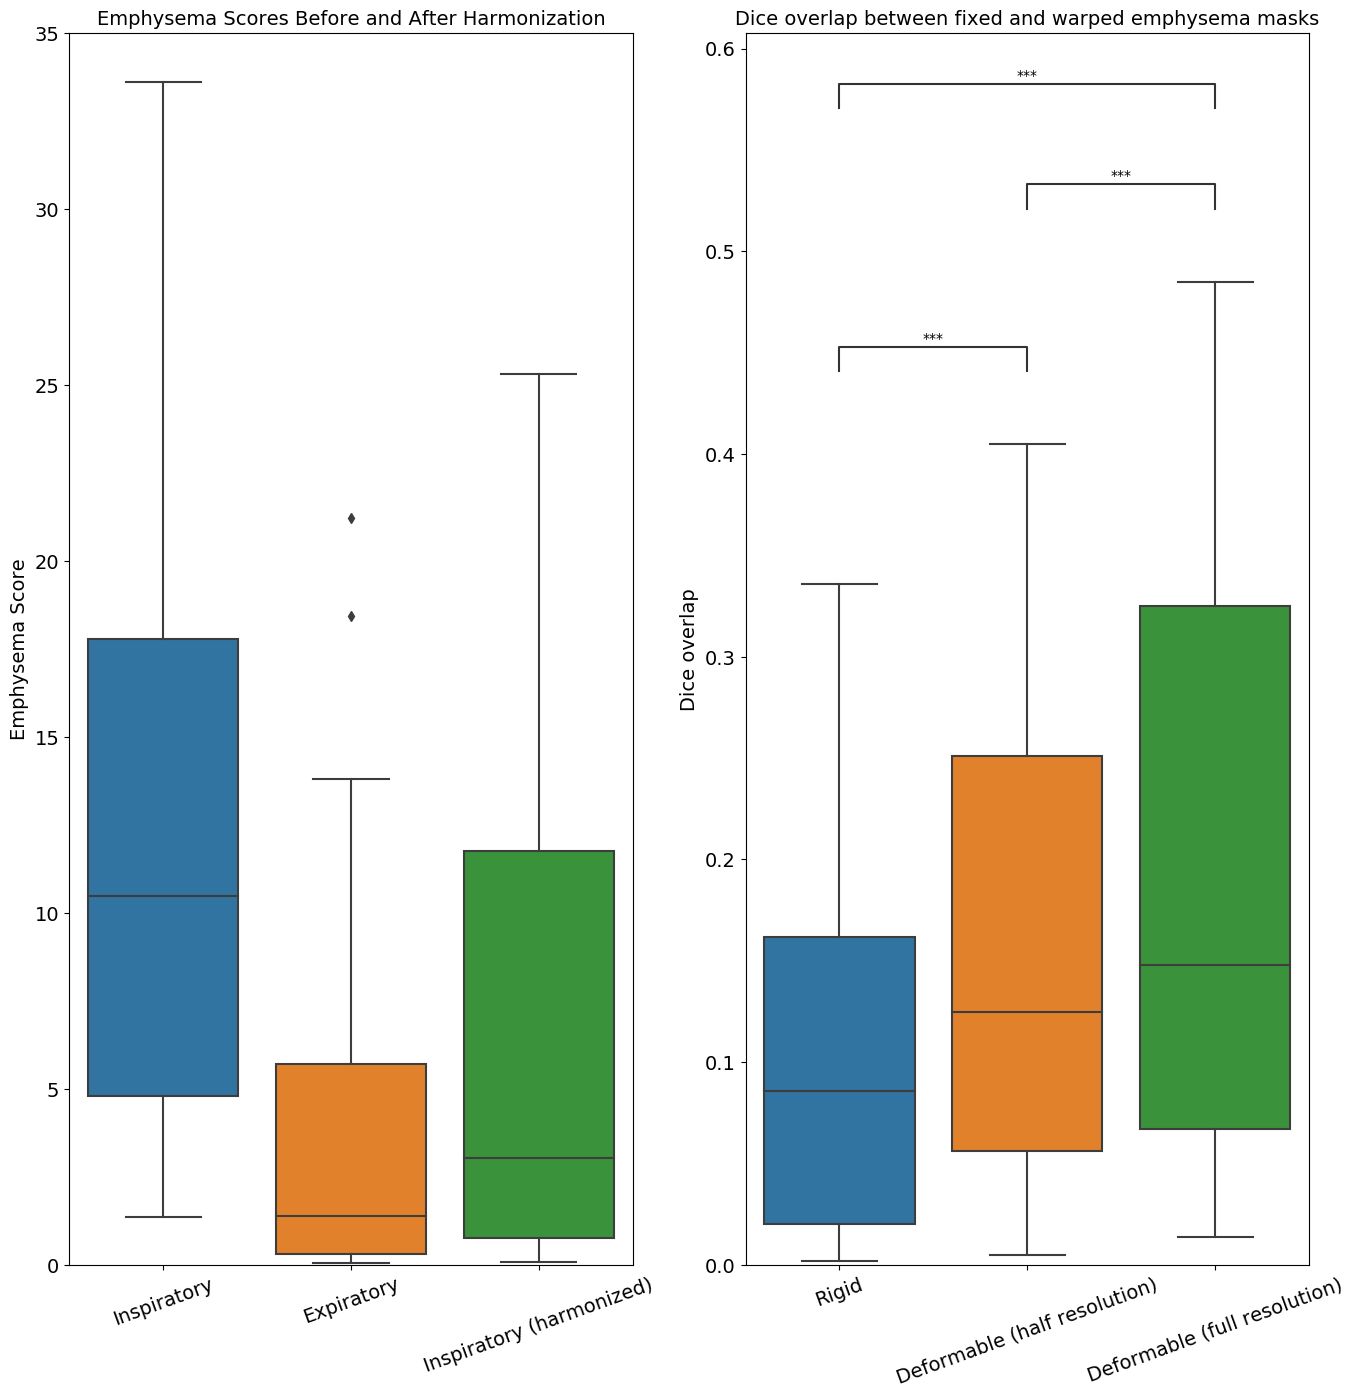

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from statannot import add_stat_annotation
import matplotlib.gridspec as gridspec

# Assuming dice_overlap_rigid, dice_overlap_deform, dice_overlap_full, insp_bone_emphysema, exp_std_emphysema, and harm_insptoexp_std_emphysema are defined

# Data for the first plot
data1 = {
    'Rigid': dice_overlap_rigid,
    'Deformable (half resolution)': dice_overlap_deform,
    'Deformable (full resolution)': dice_overlap_full
}
df1 = pd.DataFrame(data1)

# Data for the second plot
data2 = [insp_bone_emphysema, exp_std_emphysema, harm_insptoexp_std_emphysema]
labels2 = ["Inspiratory", "Expiratory", "Inspiratory (harmonized)"]

# Create a figure with a gridspec layout
fig = plt.figure(figsize=(16.5, 10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

# First plot
ax1 = plt.subplot(gs[1])
sns.boxplot(data=df1, ax=ax1)
ax1.set_ylabel("Dice overlap", fontsize=14)
ax1.set_xticklabels(df1.columns, fontsize=14, rotation=20)  # Rotate x-tick labels
ax1.set_ylim(0, 0.6)
ax1.tick_params(axis='y', labelsize=14)  # Ensure y-tick labels are correctly formatted
ax1.set_title("Dice overlap between fixed and warped emphysema masks", fontsize=14)

# Add statistical annotations to the first plot
box_pairs1 = [
    ("Rigid", "Deformable (half resolution)"),
    ("Rigid", "Deformable (full resolution)"),
    ("Deformable (half resolution)", "Deformable (full resolution)")
]
add_stat_annotation(ax1, data=df1, box_pairs=box_pairs1,
                    test='t-test_paired', text_format='star', loc='inside', verbose=2)

# Second plot
ax2 = plt.subplot(gs[0])
sns.boxplot(data=data2, ax=ax2)
ax2.set_xticklabels(labels2, fontsize=14, rotation=20)  # Rotate x-tick labels
ax2.set_ylabel("Emphysema Score", fontsize=14)
ax2.set_ylim(0, 35)
ax2.tick_params(axis='y', labelsize=14)  # Ensure y-tick labels are correctly formatted
ax2.set_title("Emphysema Scores Before and After Harmonization", fontsize=14)

# Save the figure
plt.savefig("/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/SPIE_paper_figures/quantitative/dice_emp_combined_plots.tiff", dpi=300, bbox_inches='tight')
plt.show()